In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
#import pandas_datareader as data
import yfinance as yf

In [5]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362818,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908981,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974495,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342972,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316277,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733612,144114400


In [7]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362818,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [8]:
df =df.drop(['Date', 'Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


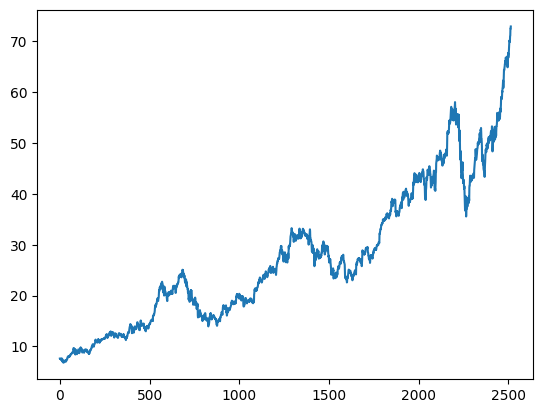

In [9]:
plt.plot(df.Close)

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

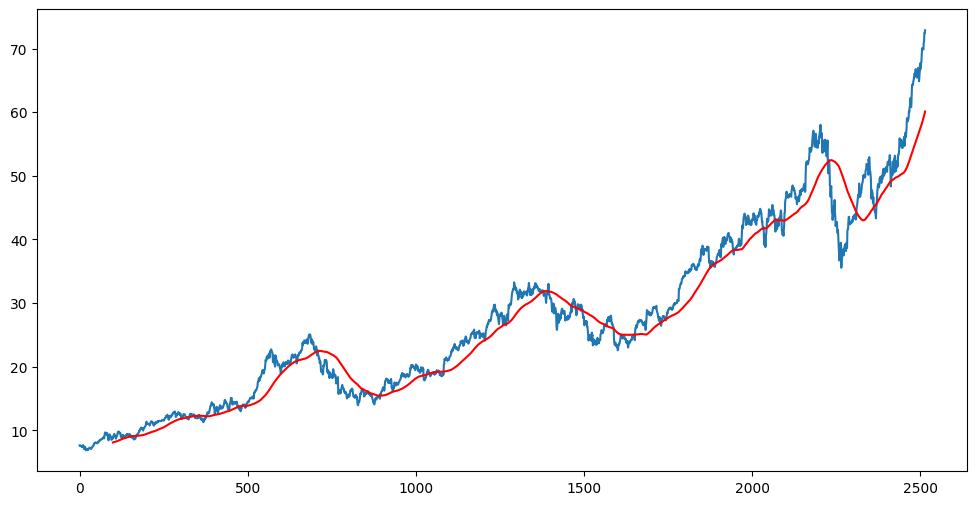

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

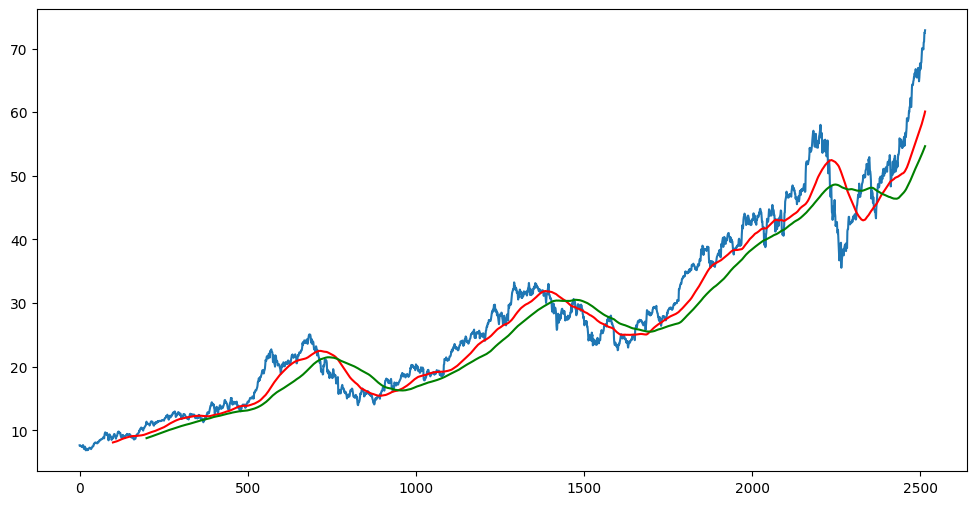

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(2515, 5)

splitting data into training and testing

In [16]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [17]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [18]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


Scaling down the data


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units =50, activation = 'relu', return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\Richa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.1383
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0143
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0120
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0105
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0094
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0086
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0074
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0076
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0076
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0075
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0069
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0071
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0069
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0060
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0057
Epoc

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [28]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [29]:
past_100_days = data_training.tail(100)

In [30]:
#final_df = past_100_days.append(data_testing, ignore_index = True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [33]:
input_data.shape

(855, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


Making predictions

In [36]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [37]:
y_predicted.shape

(755, 1)

In [38]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [39]:
y_predicted

array([[0.14557993],
       [0.14616275],
       [0.14667547],
       [0.14709723],
       [0.14742097],
       [0.14764932],
       [0.14780262],
       [0.14792019],
       [0.1480464 ],
       [0.14821647],
       [0.1484555 ],
       [0.14876696],
       [0.14914466],
       [0.14958443],
       [0.15007374],
       [0.15059437],
       [0.15112844],
       [0.15165824],
       [0.1521767 ],
       [0.15269656],
       [0.15322655],
       [0.15376715],
       [0.1543082 ],
       [0.15488304],
       [0.15558457],
       [0.15647817],
       [0.15760905],
       [0.15900727],
       [0.16068384],
       [0.16262677],
       [0.16479886],
       [0.16715428],
       [0.16966413],
       [0.17230938],
       [0.1750662 ],
       [0.17790873],
       [0.18081985],
       [0.18378945],
       [0.18680187],
       [0.18983777],
       [0.19287956],
       [0.19591011],
       [0.19892232],
       [0.20190334],
       [0.2048369 ],
       [0.20770104],
       [0.21047145],
       [0.213

In [40]:
scaler.scale_

array([0.02123255])

In [41]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

In [45]:
y_predicted

array([[ 6.856451 ],
       [ 6.8839   ],
       [ 6.9080477],
       [ 6.9279118],
       [ 6.943159 ],
       [ 6.9539137],
       [ 6.961134 ],
       [ 6.966671 ],
       [ 6.9726157],
       [ 6.980625 ],
       [ 6.991883 ],
       [ 7.006552 ],
       [ 7.0243406],
       [ 7.0450525],
       [ 7.0680976],
       [ 7.0926185],
       [ 7.1177716],
       [ 7.1427236],
       [ 7.167142 ],
       [ 7.1916265],
       [ 7.2165875],
       [ 7.2420483],
       [ 7.2675304],
       [ 7.294604 ],
       [ 7.3276443],
       [ 7.3697305],
       [ 7.422992 ],
       [ 7.488845 ],
       [ 7.567807 ],
       [ 7.6593146],
       [ 7.7616143],
       [ 7.8725486],
       [ 7.9907565],
       [ 8.115341 ],
       [ 8.24518  ],
       [ 8.379057 ],
       [ 8.516163 ],
       [ 8.656023 ],
       [ 8.797901 ],
       [ 8.940885 ],
       [ 9.084145 ],
       [ 9.226876 ],
       [ 9.368744 ],
       [ 9.509143 ],
       [ 9.647306 ],
       [ 9.7822   ],
       [ 9.912679 ],
       [10.03

In [46]:
y_test

array([ 3.40000159,  3.17250067,  3.25500113,  3.22249991,  3.37000091,
        3.69500168,  3.96500023,  3.99500092,  4.15500077,  4.03000077,
        3.977501  ,  4.21750077,  4.21500024,  4.16250047,  4.21750077,
        4.23750123,  4.21000108,  4.68750009,  4.70250139,  4.70500002,
        4.62500009,  4.5550004 ,  6.40500082,  6.35000051,  6.48750127,
        6.78999914,  7.10000052,  7.22749915,  7.32250038,  7.24749961,
        7.53999916,  7.97250192,  8.09499948,  8.05500237,  8.14750116,
        8.39250009,  8.49500101,  8.35000055,  8.38250177,  8.44999903,
        8.46500223,  9.16499919,  8.95750255,  9.16250057,  9.05249995,
        9.09750194,  8.96750087,  8.88749903,  9.00250072,  9.01750011,
        8.96500224,  9.33250255,  9.39000149,  9.21500225,  9.58250256,
        9.17749996,  9.57250042,  9.44750042,  9.37750072,  9.4375021 ,
       10.16750165, 10.24749967, 10.19999906, 10.13250181, 10.14250013,
       10.41000196, 10.22250196, 10.13250181, 10.05249997, 10.01

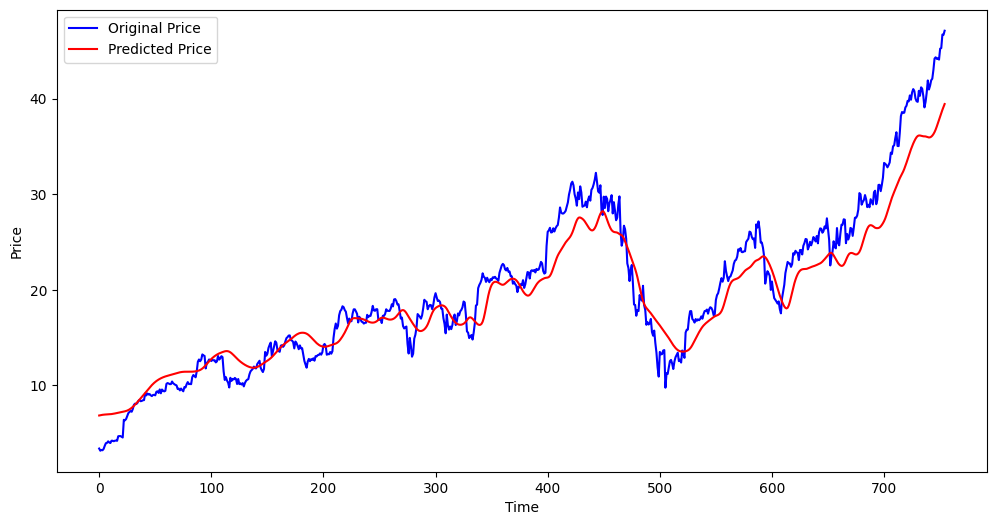

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted,'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
#from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.965032069891582


In [44]:
#from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")


R-squared: 0.9054048100272865


In [47]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
#import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predicted)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_predicted) * 100  # Converting to percentage

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

# Display metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 2.10
Mean Absolute Percentage Error (MAPE): 11.96%
Root Mean Squared Error (RMSE): 2.64
